In [1]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, load_model
from keras.layers import (Input, Dense, Dropout,CuDNNLSTM,TimeDistributed,
                                     Activation, Flatten, Conv2D,
                                     MaxPooling2D,GlobalAveragePooling2D)
from tensorflow.keras.utils import plot_model

Using TensorFlow backend.


In [2]:
from keras.models import load_model
import numpy as np
import os
import pickle
folder_path = './dataset/'
train_path = os.path.join(folder_path, "resolution_64x64x1_train.pickle")
test_path = os.path.join(folder_path, "resolution_64x64x1_test.pickle")
emotions_count = 8

def split_labels(data):
    x = []
    y = []
    for item in data:
        for i in range(0, len(item["images"]), 1):
            x.append(np.expand_dims(item["images"][i],axis=3))
            y.append(item["emotion"])
    return np.asarray(x), np.asarray(y)

In [3]:
# load 原始data
model_path = "models/base_emotion_classification_model.hdf5"
model = load_model(model_path, compile=False) 

In [4]:
# 讀取data
with open(train_path, 'rb') as handle:
    train_data = pickle.load(handle)

with open(test_path, 'rb') as handle:
    test_data = pickle.load(handle)

# split labels (emotion index and frames)
x_test, y_test = split_labels(test_data)
x_train, y_train = split_labels(train_data)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  from ipykernel import kernelapp as app


In [ ]:
# from PIL import Image
# import numpy as np

# img = Image.fromarray(test_data[0]['images'], 'RGB')
# img.save('my.png')
# img.show()

from matplotlib import pyplot as plt
#plt.imshow(test_data[0]['images'], interpolation='nearest')
plt.show(test_data[0]['images'])

In [ ]:
x_test.shape

In [8]:
x_train.shape

(62490, 64, 64, 1)

In [9]:
x_train.shape[1:]

(64, 64, 1)

In [17]:
# image preprocessing
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

# 將 features(照片影像特徵值)標準化，可以提高模型預測的準確度，並且更快收斂
# x_train /= 255  # rescaling
# x_test /= 255  # rescaling

In [6]:
# 將訓練資料與測試資料的label，進行Onehot encoding轉換
emotions_count = 8
# y_train = np.eye(emotions_count, dtype='float32')[y_train[:, 0]]
# y_test = np.eye(emotions_count, dtype='float32')[y_test[:, 0]]

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (62490, 8)
y_test shape: (6180, 8)


In [8]:
# 編譯模型
# 選用 Adam 為 optimizer
learning_rate = 0.00005
optimizer = keras.optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])



In [9]:
batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    #callbacks=callbacks_list)

Train on 62490 samples, validate on 6180 samples
Epoch 1/10
62490/62490 [==============================] - 72s 1ms/step - loss: 1.2520 - accuracy: 0.5967 - val_loss: 0.7998 - val_accuracy: 0.7121
Epoch 2/10
62490/62490 [==============================] - 66s 1ms/step - loss: 0.7329 - accuracy: 0.7452 - val_loss: 0.6246 - val_accuracy: 0.7722
Epoch 3/10
62490/62490 [==============================] - 67s 1ms/step - loss: 0.5550 - accuracy: 0.8154 - val_loss: 0.5009 - val_accuracy: 0.8248
Epoch 4/10
62490/62490 [==============================] - 66s 1ms/step - loss: 0.4444 - accuracy: 0.8559 - val_loss: 0.4043 - val_accuracy: 0.8650
Epoch 5/10
62490/62490 [==============================] - 66s 1ms/step - loss: 0.3657 - accuracy: 0.8848 - val_loss: 0.3356 - val_accuracy: 0.8929
Epoch 6/10
62490/62490 [==============================] - 67s 1ms/step - loss: 0.3072 - accuracy: 0.9065 - val_loss: 0.2993 - val_accuracy: 0.9052
Epoch 7/10
62490/62490 [==============================] - 67s 1ms/ste

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
y_pred = model.predict(x_test)
print(y_pred[:3])
y_pred = y_pred.argmax(-1)
print(y_pred[:3])

[[7.9319980e-03 3.6339483e-01 6.2474936e-01 1.3635794e-07 2.0566581e-06
  5.2204157e-08 5.9986731e-09 3.9215344e-03]
 [6.1462275e-03 1.9088806e-01 7.9924983e-01 6.5989745e-08 2.2225147e-06
  5.7173231e-08 2.8256615e-09 3.7135368e-03]
 [8.9423954e-03 2.9349843e-01 6.9393706e-01 1.3613089e-07 2.0199966e-06
  7.4252895e-08 3.7848191e-09 3.6198453e-03]]
[2 2 2]


In [12]:
print(accuracy_score(y_test.argmax(-1), y_pred))
print(confusion_matrix(y_test.argmax(-1), y_pred))

0.9546925566343042
[[345   7   3   0   2   0   0   3]
 [  2 817  14   0   0   0   0   7]
 [  4  40 659   1   0   0   0  16]
 [  0   3   0 835   1  14  13   4]
 [  0   0   0   5 914   0   0  11]
 [  0   0   0   9   2 785   0  14]
 [  0   0   0   5   2   6 912   5]
 [ 25  15   6   6  15  20   0 633]]


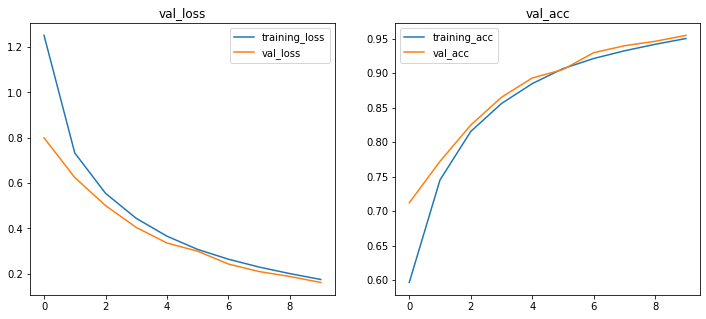

In [13]:
import matplotlib.pyplot as plt
train_history = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
name_history = ['training_loss', 'val_loss', 'training_acc', 'val_acc']

plt.figure(figsize=(12, 5))
for eachx, eachy, i in zip(train_history, name_history, range(4)):
    if i % 2 == 0:
        plt.subplot(1, 2, i//2+1)
    l_x = len(history.history[eachx])
    plt.plot(np.arange(l_x), history.history[eachx], label=eachy)
    plt.legend(loc='best')
    plt.title(eachy)
plt.show()

In [14]:
# save
index = 'base_3'
name = "emotion_classificator_{}.hdf5".format(index)
name = os.path.join('models/', name)

model.save(name)
print("Model was saved to {}".format(name))

Model was saved to models/emotion_classificator_base_3.hdf5


/opt/conda/lib/python3.7/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '
